# Continuous Distributions

Data visualization of continuous distributions with the help of graphs and plots.

## Importing libraries and load data

### Importing libraries and loading data

In [1]:
# Important libraries to import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import pylab as py 

import warnings
warnings.filterwarnings('ignore')

sns.set(style = 'white')
print(pd.__version__)
print(np.__version__)

2.1.1
1.26.1


In [2]:
# Loading data
data = pd.read_csv('datasets/churn_prediction.csv')

# Printing the data
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [3]:
# Shape and columns of the data
print('Shape:', data.shape)
print('Columns:', data.columns)

Shape: (28382, 21)
Columns: Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')


## Generating plots

- Histograms are used to visualize the data over a continuous interval.
- It shows the frequency on y-axis for each interval / bin. **hist()** is used to generate the histogram for visualization. 

<Figure size 896x672 with 0 Axes>

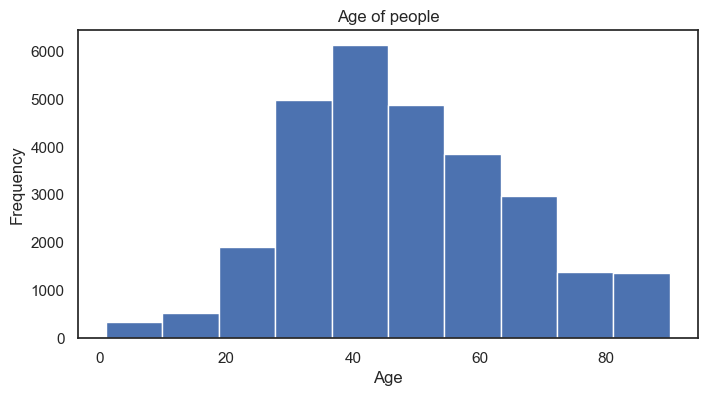

In [5]:
# Plotting histogram
plt.figure(dpi = 140)
plt.figure(figsize = (8, 4))

# Histogram on the basis of age
plt.hist(data['age'])

# Giving the labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of people')

# Plotting the graph
plt.show()

In [11]:
# Calculating points of standard deviation
mean = data['age'].mean().round(2)
median = data['age'].median().round(2)

<Figure size 896x672 with 0 Axes>

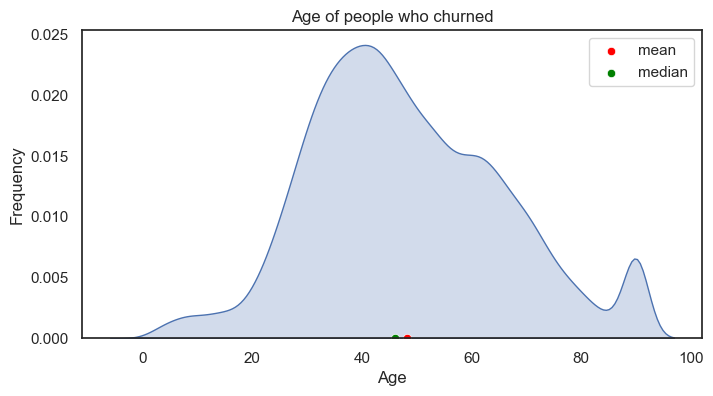

In [12]:
# plottizng KDE plot with descriptives
plt.figure(dpi = 140)
plt.figure(figsize = (8, 4))
plt.subplot(1, 1, 1)

# Plotting KDE Plot, scatterplot
sns.kdeplot(data['age'], shade = True)
sns.scatterplot(x = [mean], y = [0], color='red', label = 'mean')
sns.scatterplot(x = [median], y = [0], color='green', label = 'median')
# sns.lineplot(x = stdev, y = [0,0], color = 'black', label = 'standard deviation')

# Titles and Axes labels
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of people who churned')
plt.show()

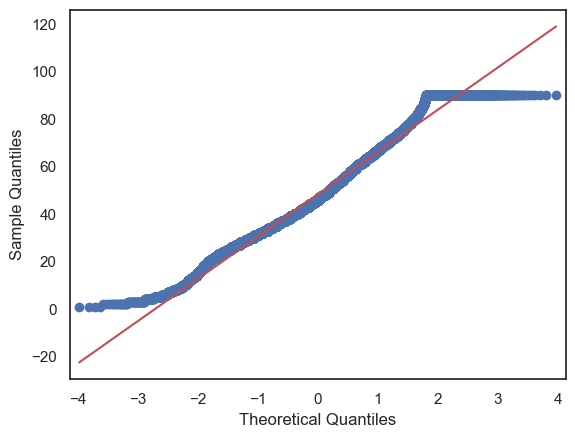

In [13]:
# visualize a QQ plot 
sm.qqplot(data['age'], line = 's') 

py.show() 

* __Larger values__ are __not as large/extreme__ as expected from a Normal Distribution.
* __Smaller values__ are __not as smaller/extreme__ as expected from a Normal Distribution.

In [14]:
print('Skewness:', data['age'].skew().round(2))
print('Kurtosis:', data['age'].kurtosis().round(2))

Skewness: 0.33
Kurtosis: -0.17


- __Skewness__ is around 0.33. Age of Cusotmers follows a __normal__ like Distribution.
- __Kurtosis value__ is also close to zero. This means tails are not as __dense__ as compared to normal distribution.

In [18]:
# calculating measures
v_mean = data['vintage'].mean()
v_median = data['vintage'].median()
v_mode = data['vintage'].mode()

# checking
v_mode

0    2251
1    2260
Name: vintage, dtype: int64

In [19]:
print(data[data['vintage'] == 2251].shape[0])
print(data[data['vintage'] == 2260].shape[0])

69
69


The frequency for 2251 and 2260 is 69, __Both__ of them qualify to be the __mode__ value (most frequent value) for the dataset.

<Figure size 896x672 with 0 Axes>

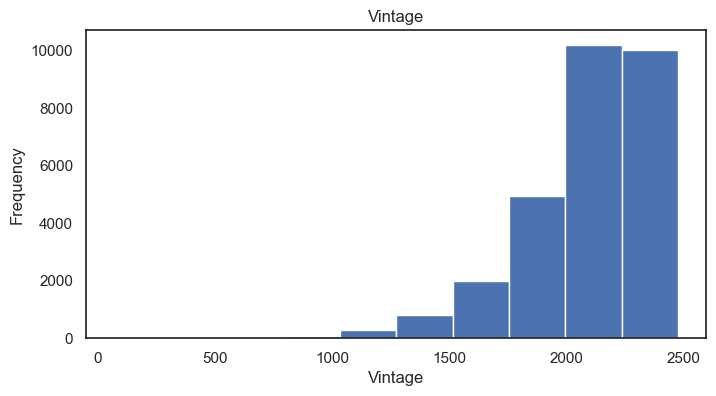

In [20]:
# plotting histogram
plt.figure(dpi = 140)
plt.figure(figsize = (8,4))
plt.hist(data['vintage'])

plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.title('Vintage')

plt.show()

- Clearly Histogram indicates that distribution is __Left Skewed__ for vintage.
- More customers have interaction with the bank from More days in compare to the customer who are new for the bank.

<Figure size 896x672 with 0 Axes>

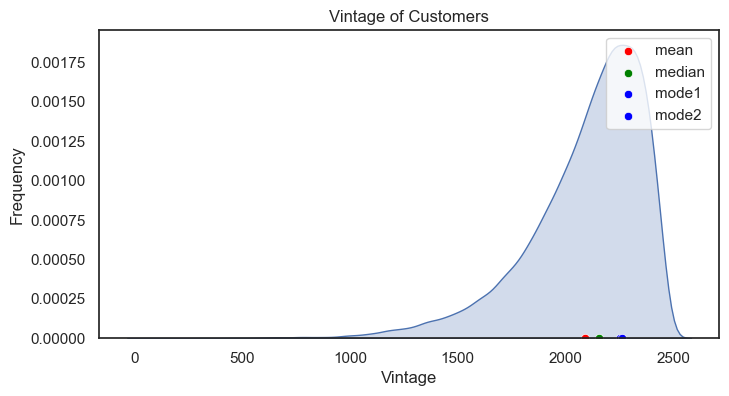

In [26]:
# plotting KDE plot with descriptives
plt.figure(dpi = 140)
plt.figure(figsize = (8,4))

sns.kdeplot(data['vintage'], shade = True)
sns.scatterplot(x = [v_mean], y = [0], color='red', label='mean')
sns.scatterplot(x = [v_median], y = [0], color='green', label='median')
sns.scatterplot(x = [v_mode[0]], y = [0], color='blue', label='mode1')
sns.scatterplot(x = [v_mode[1]], y = [0], color='blue', label='mode2')

plt.xlabel('Vintage')
plt.ylabel('Frequency')

plt.title('Vintage of Customers')
plt.show()

**Inferences Drawn:**

- KDE indicates that Vinatge of Customers follow a distribution which is __Left Skewed__.
- __Mean and Median__ are __higher__ than the __mode__ Value.
- Tail on the __left__ side of the distribution is __longer__.

In [27]:
print('Skewness:', data['vintage'].skew().round(2))
print('Kurtosis:', data['vintage'].kurtosis().round(2))

Skewness: -1.39
Kurtosis: 2.72


- __Negative skewness__ indicates __negatively skewed__ which is also known as __feft skewed distribution__
- __Positive Kurtosis__ indicates __leptokurtic distribution__ which is __longer__ in compare to normal distribution. 

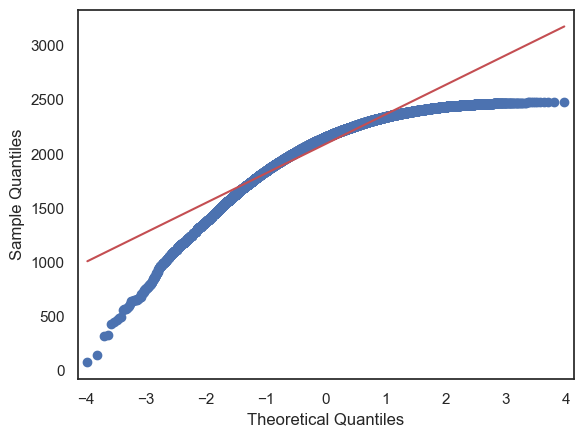

In [28]:
# Displaying QQ plot
sm.qqplot(data['vintage'], line='s') 
py.show() 

* Larger values are not as large as expected from a normal distribution.
* Smaller values are lesser in magnitude as compared to a normal distribution.